# Test Larger Data Set

This notebook imports 3.5 hours worth of data and computes some hourly averages. The sensor was placed on the countertop of a high-traffic kitchen-dining room area, near a flower bouquet.

## Table of Contents:
* [Import Data](#Header-1)
* [Organize Data and Plot](#Header-2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

## Import Data <a class="anchor" id="Header-1"></a>

Get all filenames from directory and assemble array of paths:

In [2]:
directory = os.listdir(r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\Longitudinal 07-05')
j = 0
data = [''] * len(directory)
for i in directory:
    path = r'C:\Users\vendi\Desktop\Internships and Work\NYU\Test Data\Longitudinal 07-05' + "\\" + i
    data[j] = pd.read_csv(path)
    j = j + 1

Put all tables together into one datastructure: 

In [3]:
table = pd.concat([data[0], data[1]], ignore_index=True)
for i in range(2,len(data)):
    table = pd.concat([table,data[i]],ignore_index=True)

Set datatime as a date/time object and convert timezone:

In [4]:
table["datetime"] = pd.to_datetime(table["datetime"],unit='s',origin='unix')
table["datetime"] = table["datetime"].dt.tz_localize('utc').dt.tz_convert('America/New_York')

## Organize Data and Plot <a class="anchor" id="Header-2"></a>

Find hourly average of PM2.5 values and plot in bar graph:

Text(0.5, 1.0, 'Average PM2.5 Concentration Per Hour During Test')

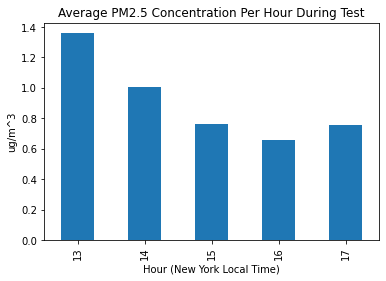

In [6]:
table.groupby(table["datetime"].dt.hour)["PM2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (New York Local Time)')
plt.ylabel('ug/m^3')
plt.title("Average PM2.5 Concentration Per Hour During Test")

Find hourly average of PC2.5 values and plot in bar graph

Text(0.5, 1.0, 'Average PC2.5 Concentration Per Hour During Test')

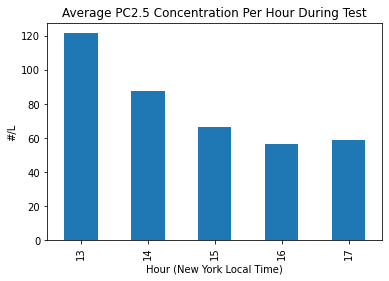

In [7]:
table.groupby(table["datetime"].dt.hour)["PC2.5"].mean().plot(kind='bar')
plt.xlabel('Hour (New York Local Time)')
plt.ylabel('#/L')
plt.title("Average PC2.5 Concentration Per Hour During Test")